In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_after_cleaned.csv')


x = df.drop(columns=['target'])
y = df['target']

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_1560\2181078240.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_after_cleaned.csv')


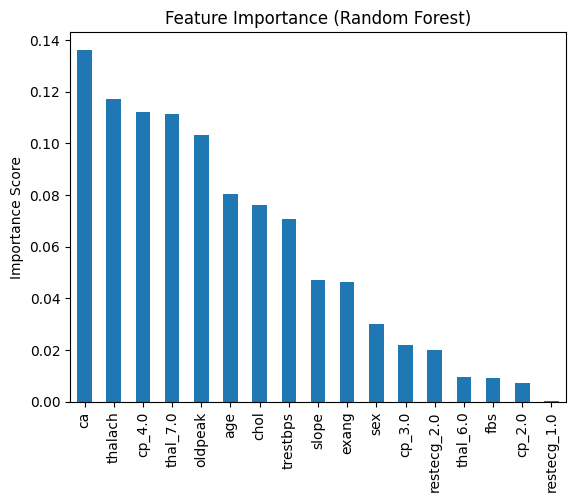

In [3]:
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)

feat_imp.plot(kind="bar", title="Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

# After Random Forest
feat_rf = set(feat_imp.head(10).index) 

In [4]:
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=8)
rfe.fit(x, y)

selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

# After RFE
feat_rfe = set(x.columns[rfe.support_])

Selected Features: Index(['sex', 'exang', 'oldpeak', 'slope', 'ca', 'cp_2.0', 'cp_4.0',
       'thal_7.0'],
      dtype='object')


In [5]:
X_scaled = MinMaxScaler().fit_transform(x)

selector = SelectKBest(score_func=chi2, k=8)
X_new = selector.fit_transform(X_scaled, y)

selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features)

# After Chi2
feat_chi2 = set(x.columns[selector.get_support()])

Selected Features: Index(['exang', 'oldpeak', 'slope', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'thal_7.0'],
      dtype='object')


In [6]:
# Find common features
common_features = feat_rfe & feat_rf & feat_chi2
print(common_features)

{'cp_4.0', 'slope', 'ca', 'oldpeak', 'thal_7.0', 'exang'}


In [7]:
intersection_two = (feat_rfe & feat_rf) | (feat_rfe & feat_chi2) | (feat_rf & feat_chi2)
print("Intersection of two sets:", intersection_two)

Intersection of two sets: {'slope', 'cp_2.0', 'ca', 'oldpeak', 'exang', 'thal_7.0', 'cp_4.0'}


In [8]:
# Create a new DataFrame with selected features and target
selected_columns = list(intersection_two) + ['target']
df_selected = df[selected_columns]

# Save to CSV
df_selected.to_csv('data/heart_disease_selected_features.csv', index=False)